# **India Air Quality Data Analysis**

### Since industrialization, there has been an increasing concern about environmental pollution. As mentioned in the WHO report 7 million premature deaths annually linked to air pollution , air pollution is the world's largest single environmental risk. Moreover as reported in the NY Times article, India’s Air Pollution Rivals China’s as World’s Deadliest it has been found that India's air pollution is deadlier than even China's. Using this dataset, one can explore India's air pollution levels at a more granular scale.

## **Dataset link : https://www.kaggle.com/shrutibhargava94/india-air-quality-data**

### This data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).

In [193]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [194]:
# loading dataset
df=pd.read_csv("/content/data.csv", encoding='cp1252')
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [195]:
df['date'].dropna(axis=0, inplace=True)

In [196]:
#size of the dataset
print(len(df))

435742


In [197]:
# printing features data type
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [198]:
# list of feature columns
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [199]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [200]:
# describing the statistics of the given dataset
print(df.describe())

                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000


In [201]:
# displaying total number of duplicate rows/samples
df.duplicated().sum()

674

In [202]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [203]:
# conversion from "object" data type to "datetime" data type
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.head(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year,month
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0,2.0
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0,3.0


## Visualization

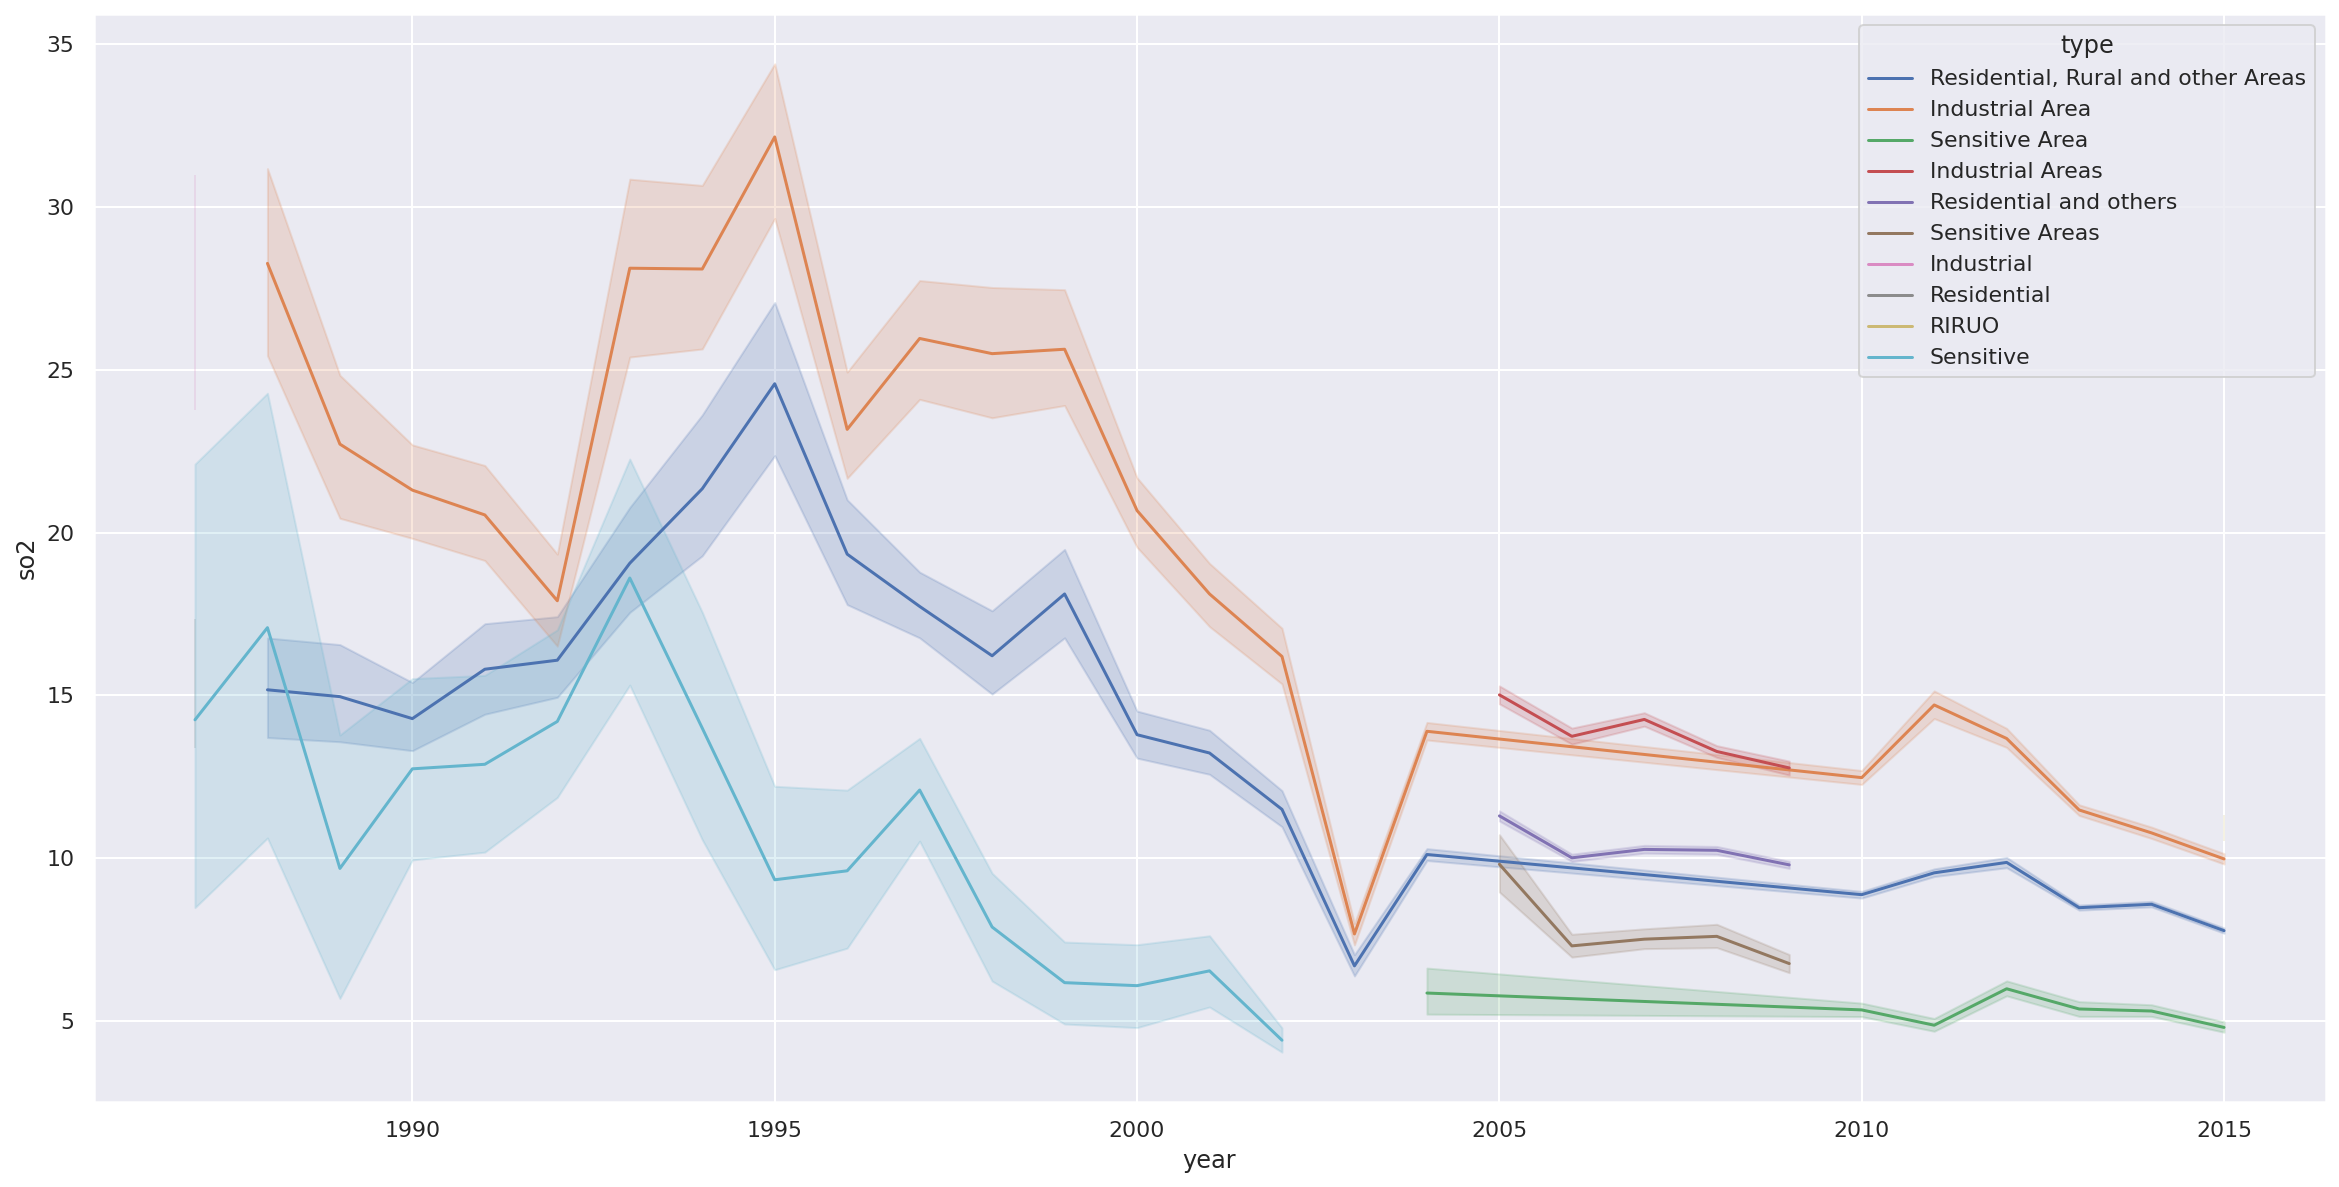

In [204]:
#increase in so2 level over the years
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y="so2", hue='type', data=df)
plt.show()

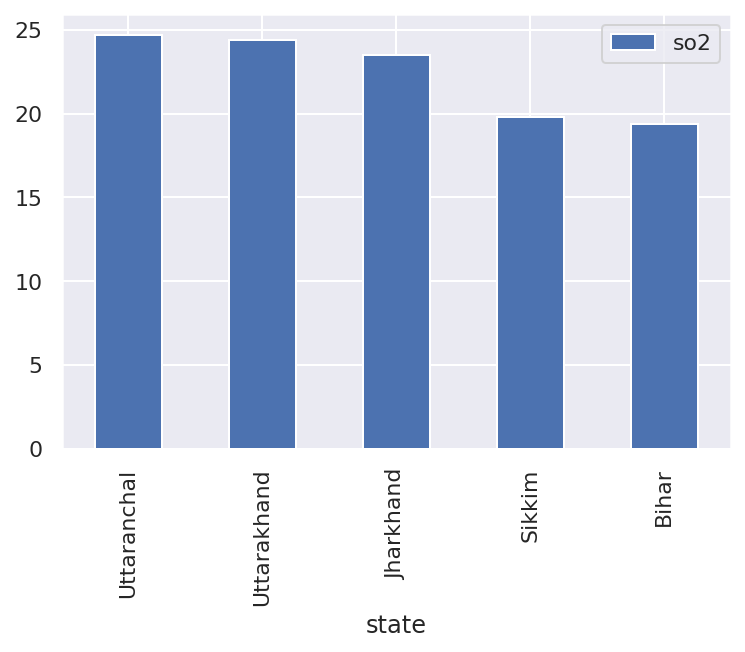

In [205]:
# So2 level in the top 5 states
df[['state', 'so2']].groupby(['state']).mean().sort_values(by='so2',ascending=False)[:5].plot.bar()

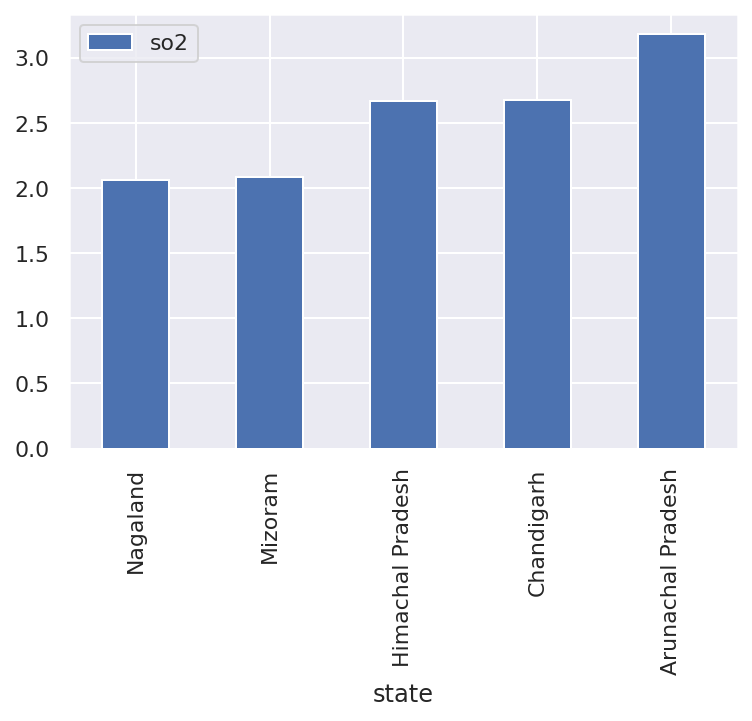

In [206]:
# So2 level in the bottom 5 states
df[['state', 'so2']].groupby(['state']).mean().sort_values(by='so2',ascending=True)[:5].plot.bar()

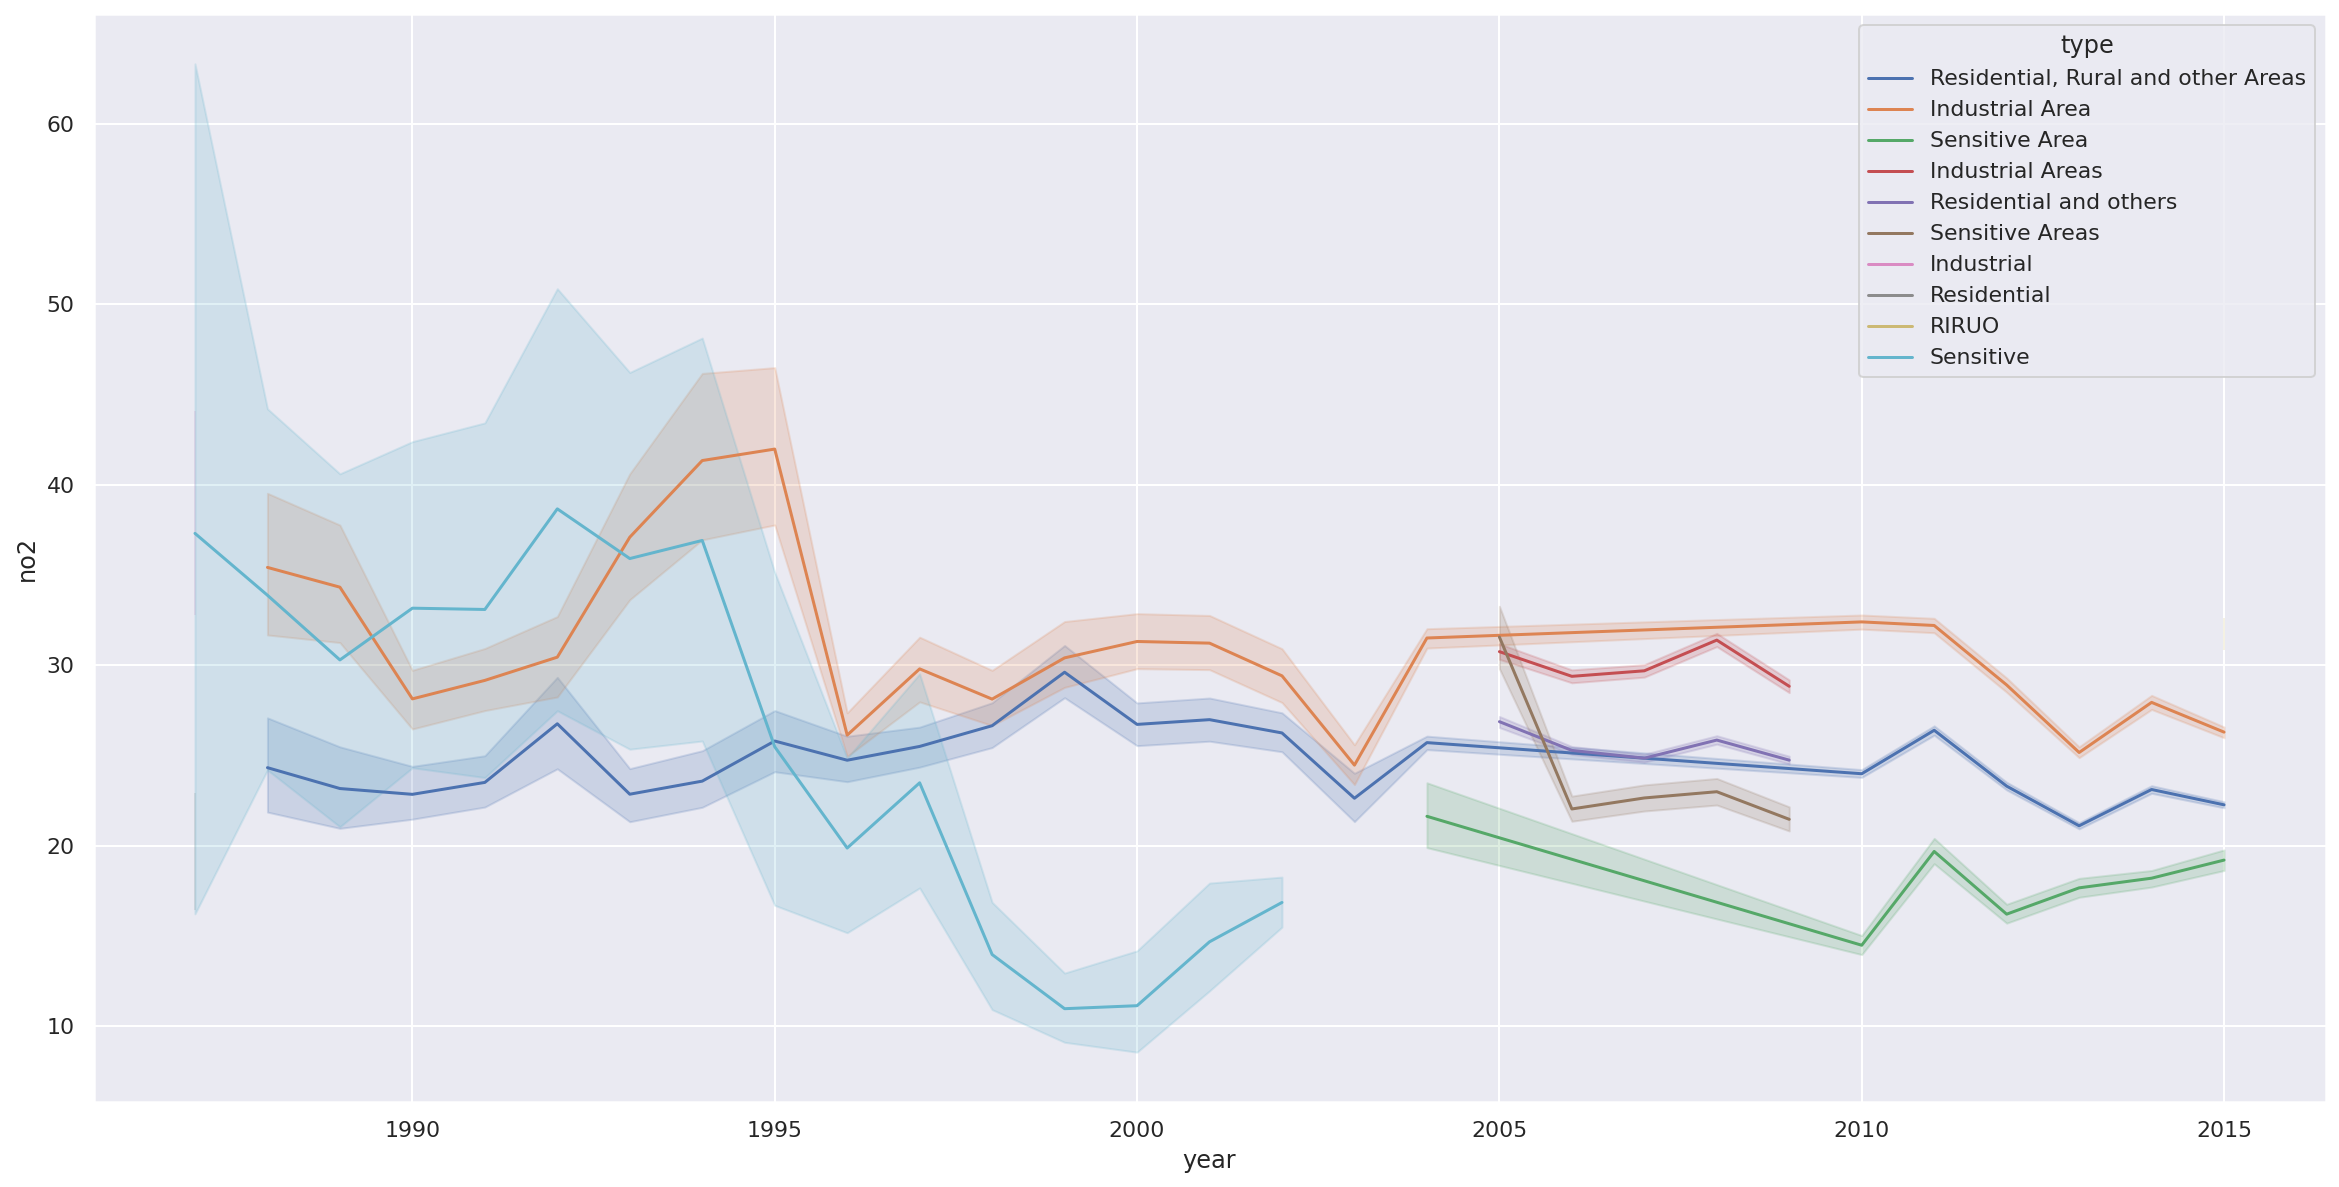

In [207]:

#increase in no2 level over the years
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y="no2", hue='type', data=df)
plt.show()

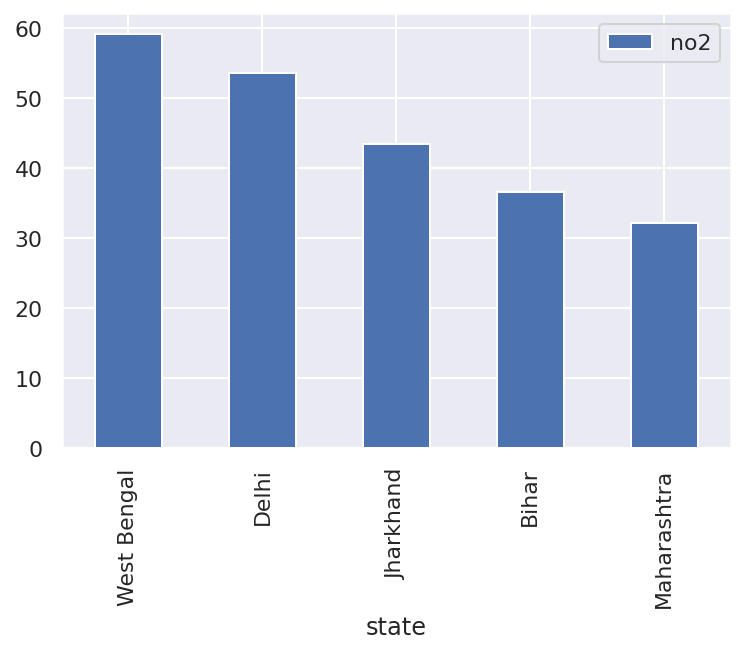

In [208]:
# No2 level in the top 5 states
df[['state', 'no2']].groupby(['state']).mean().sort_values(by='no2',ascending=False)[:5].plot.bar()

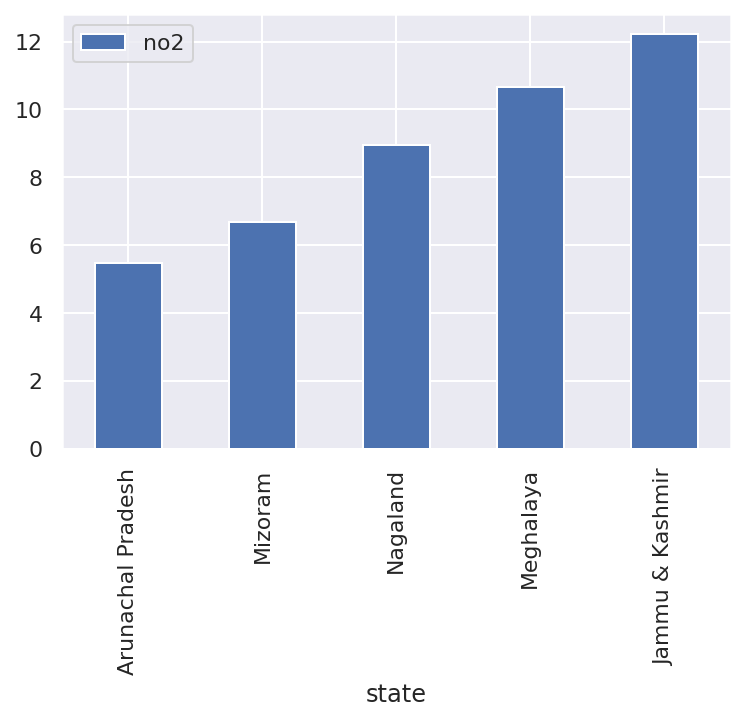

In [209]:
# No2 level in the bottom 5 states
df[['state', 'no2']].groupby(['state']).mean().sort_values(by='no2',ascending=True)[:5].plot.bar()

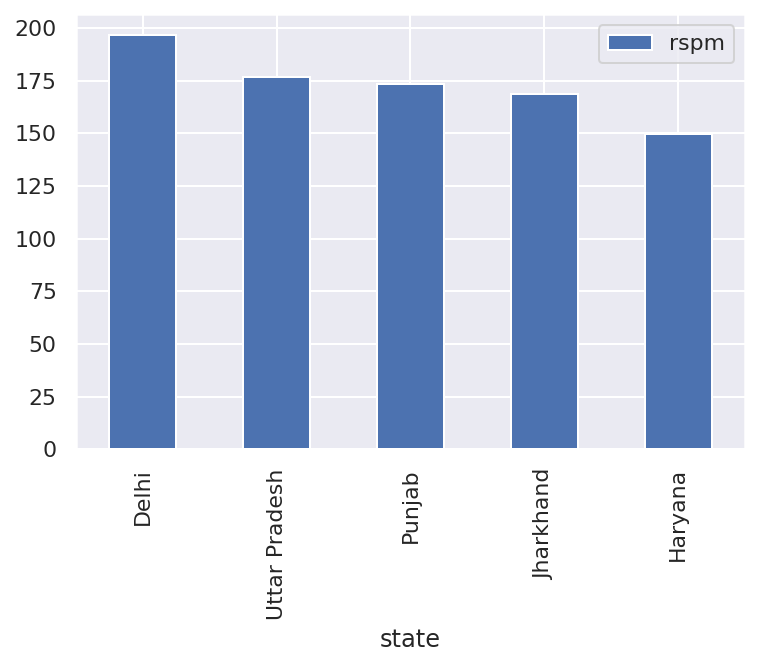

In [210]:
# rspm level in the top 5 states
df[['state', 'rspm']].groupby(['state']).mean().sort_values(by='rspm',ascending=False)[:5].plot.bar()

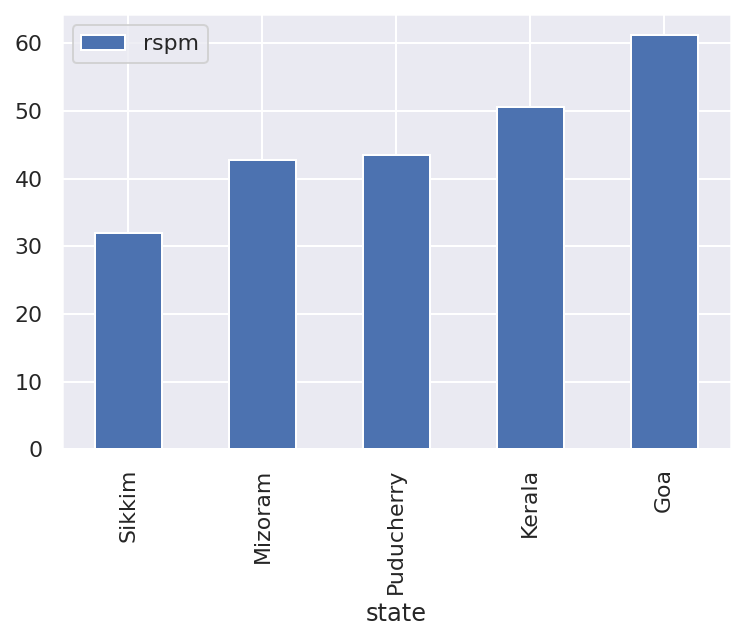

In [211]:
#rspm level in the bottom 5 states
df[['state', 'rspm']].groupby(['state']).mean().sort_values(by='rspm',ascending=True)[:5].plot.bar()

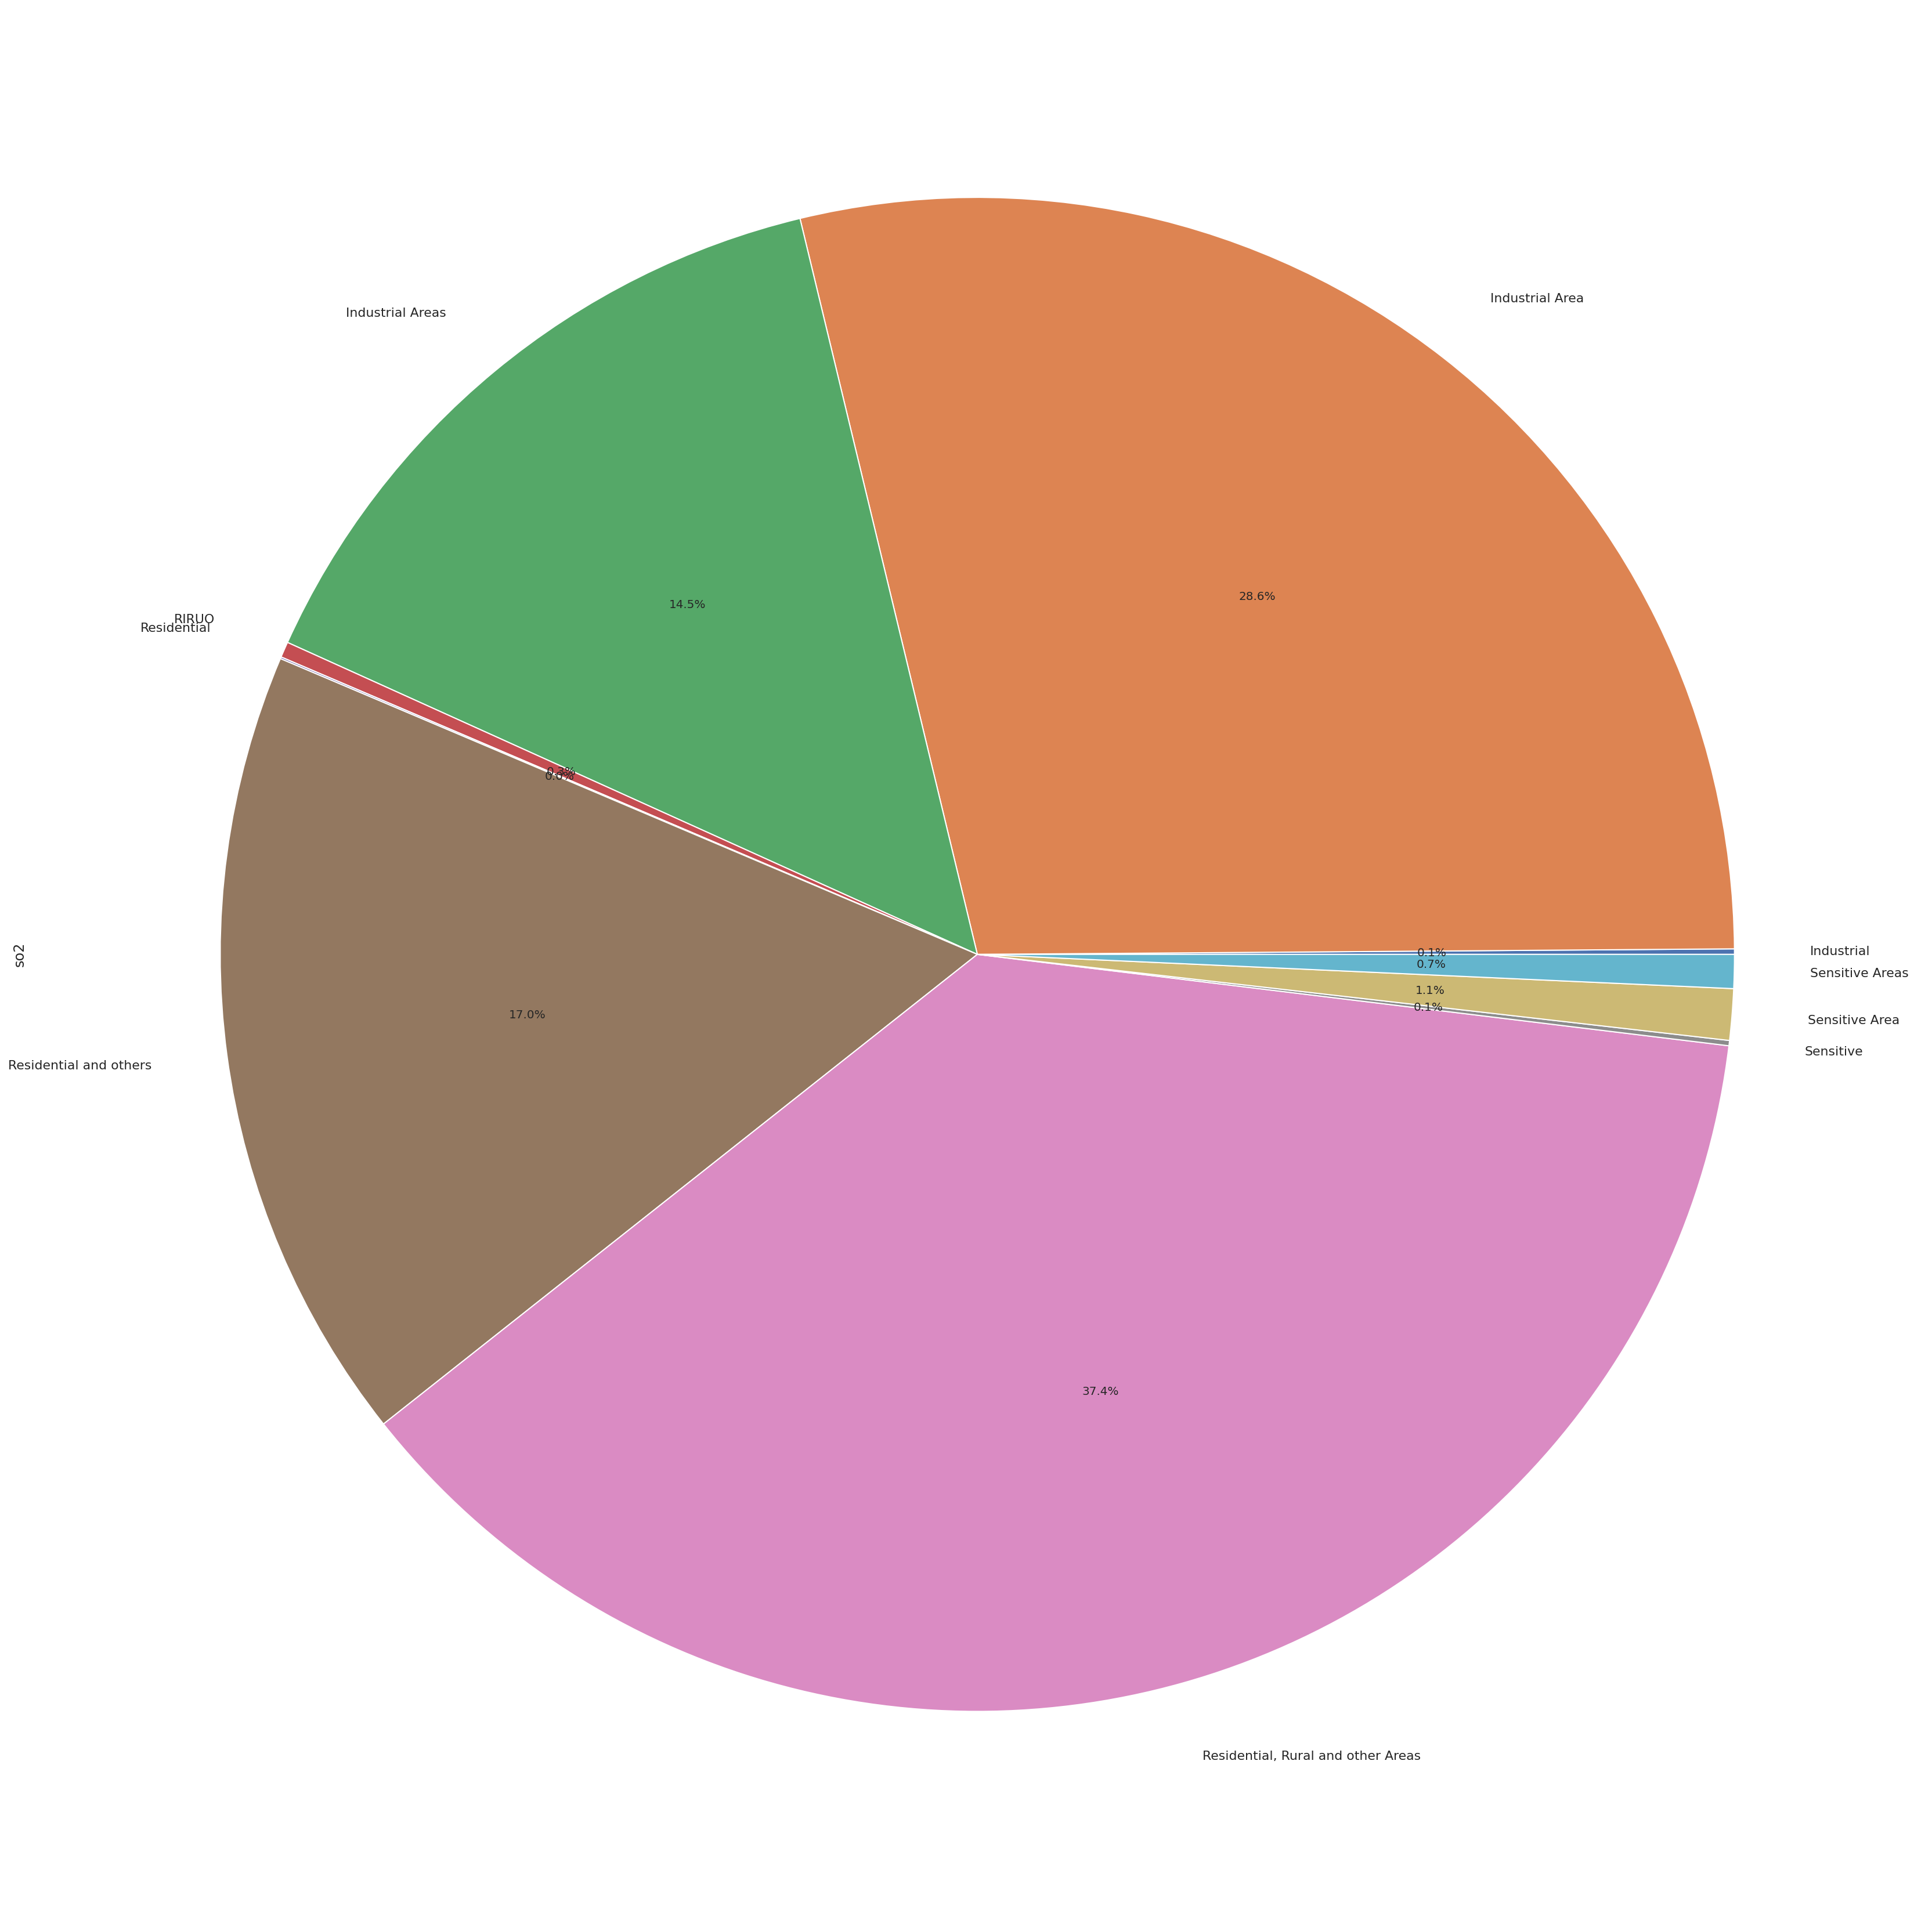

In [212]:
# level of So2 in the different area
fig = plt.figure(figsize=(30, 30))
data = df.groupby("type")["so2"].sum()
data.plot.pie(autopct="%.1f%%")

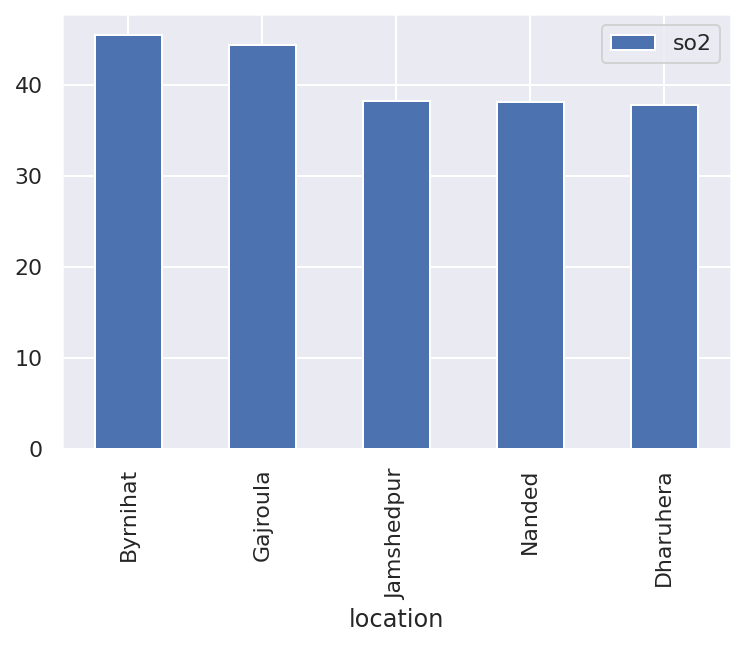

In [213]:
# So2 level location wise
df[['state', 'so2', 'location']].groupby(['location']).mean().sort_values(by='so2',ascending=False)[:5].plot.bar()

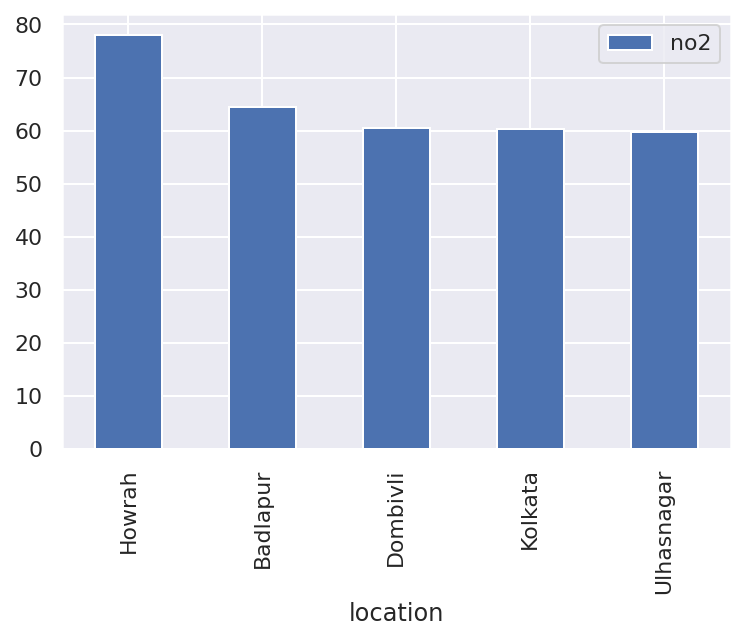

In [214]:
# No2 level location wise
df[['state', 'no2', 'location']].groupby(['location']).mean().sort_values(by='no2',ascending=False)[:5].plot.bar()

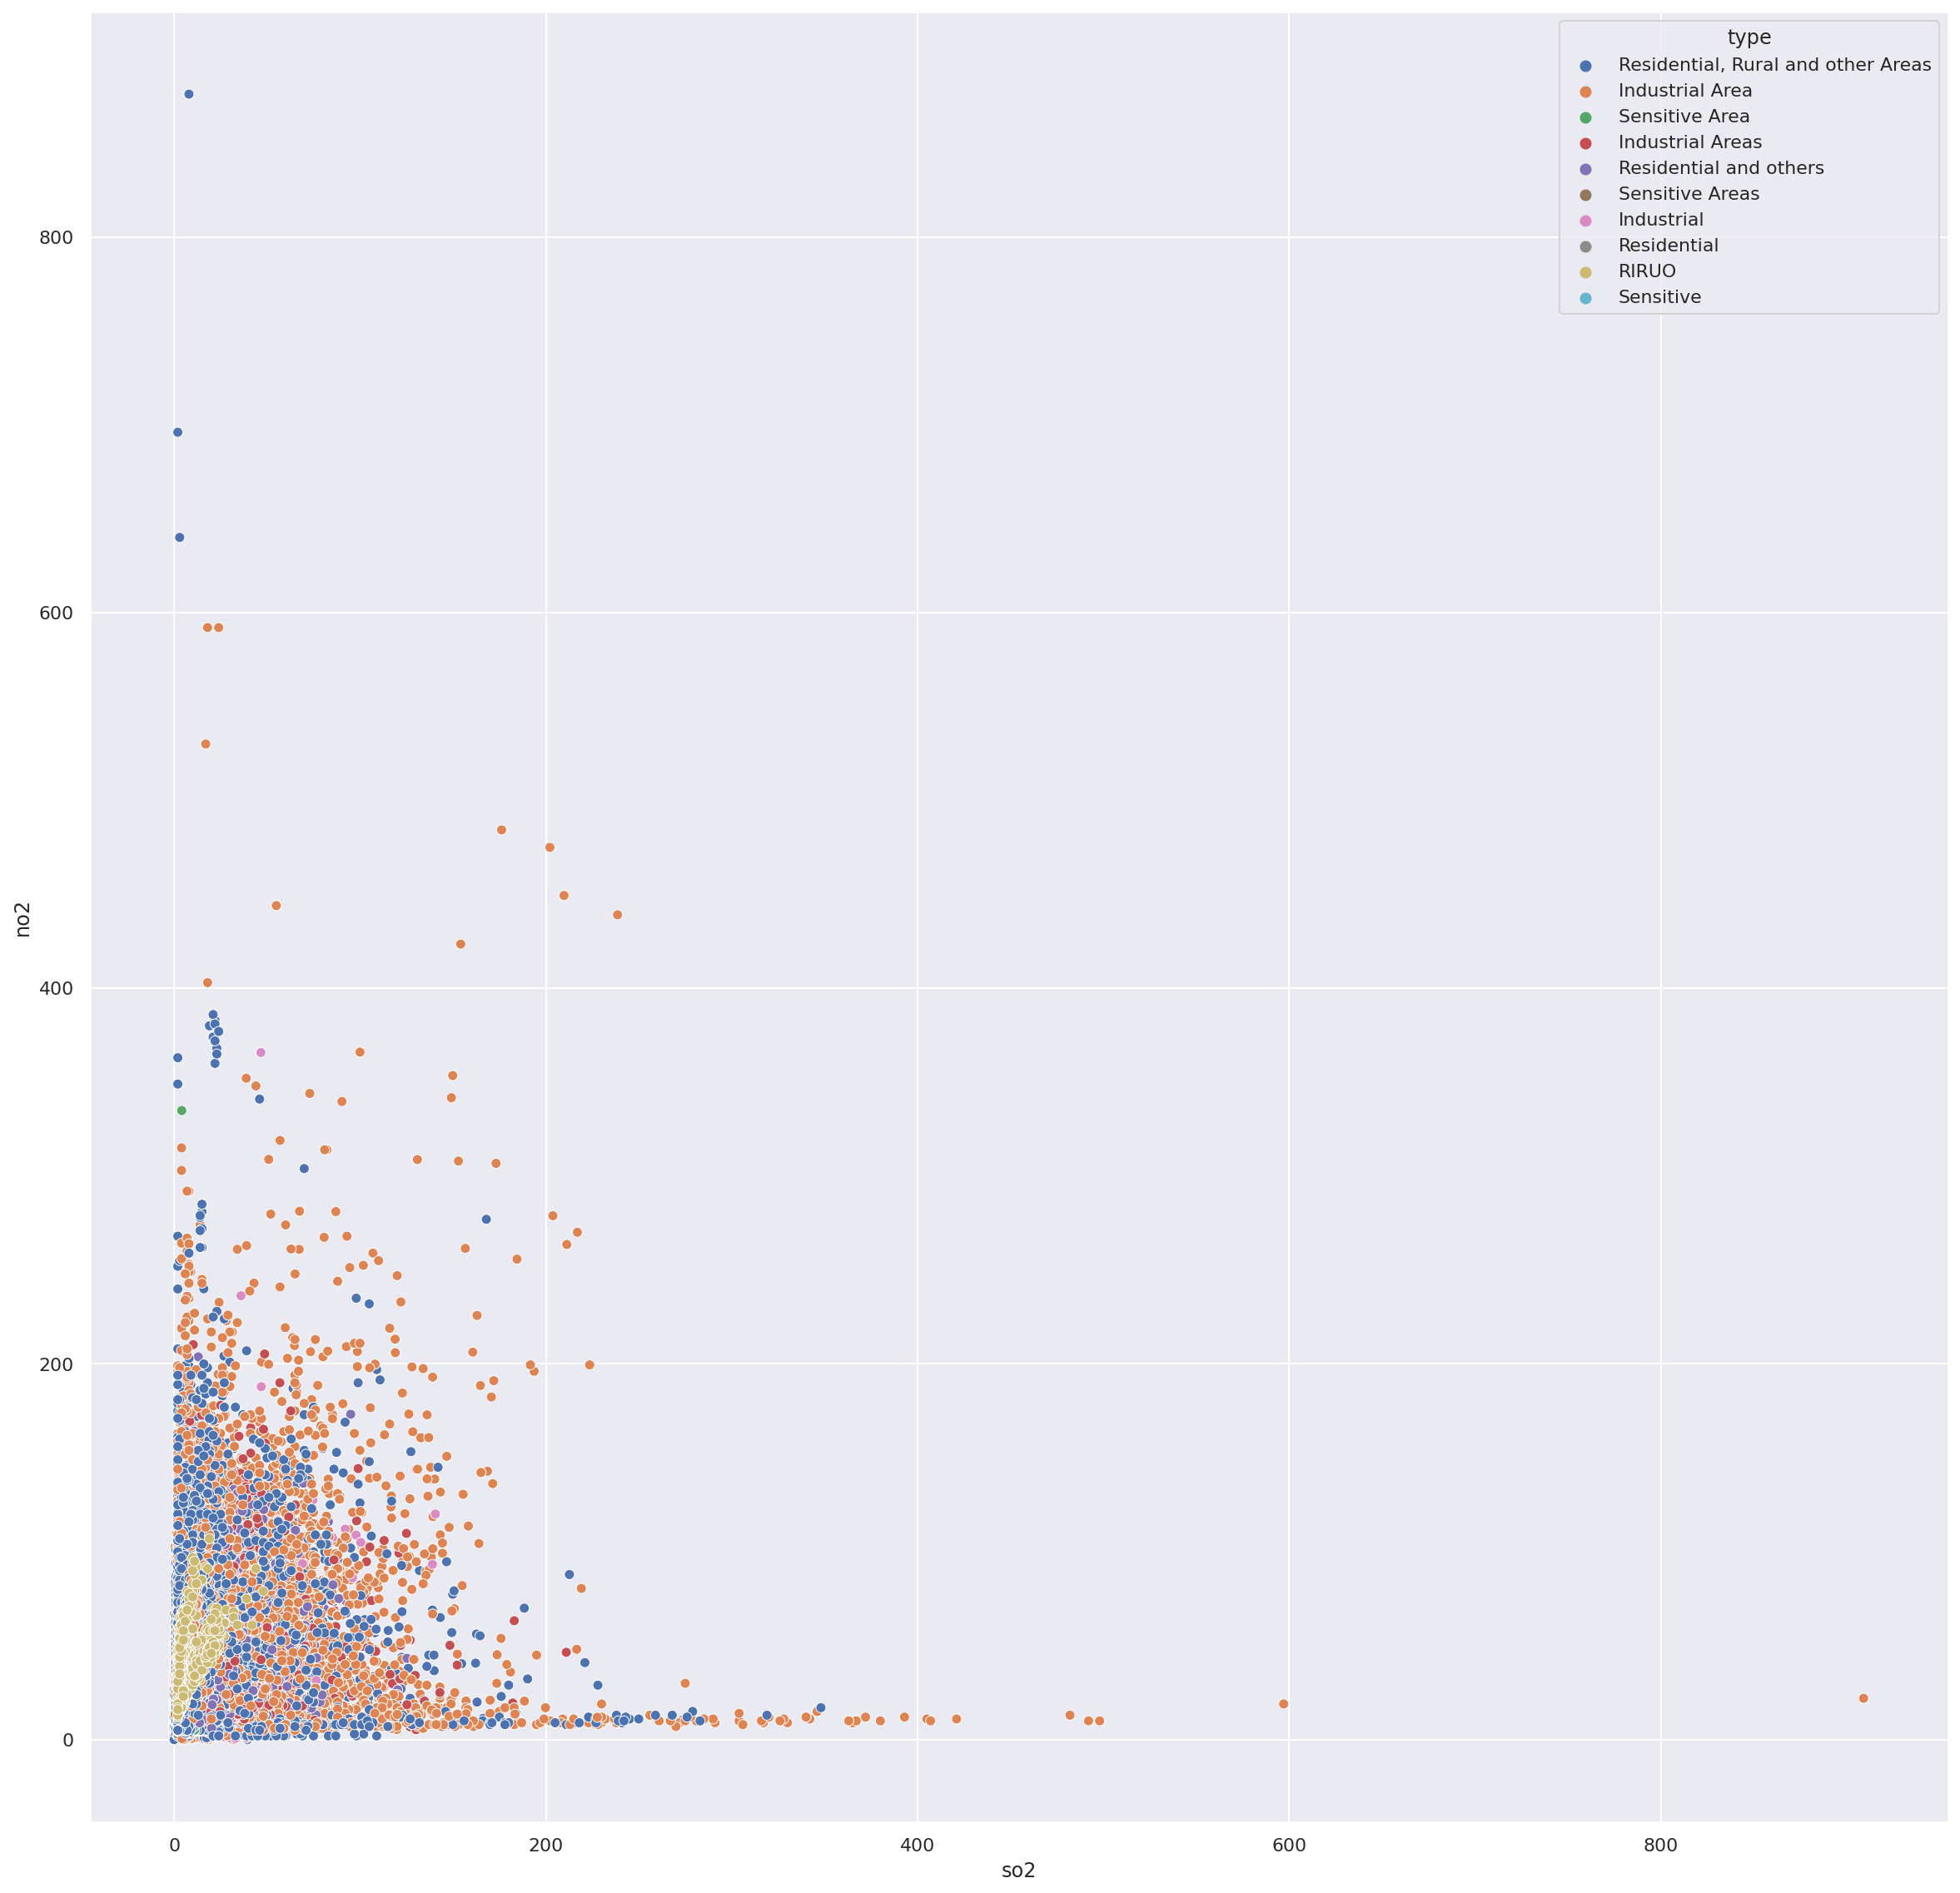

In [215]:
# source of so2 and no2 gas
fig = plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x="so2", y="no2", hue="type")